In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [38]:
df =  pd.read_csv('D:/Titanic-Dataset.csv')
print("read successfully")

read successfully


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
# finding the duplicate value

In [45]:
for col in df:
    duplicate_count = df[col].duplicated().sum()
    print(f"column {col}-{duplicate_count} dupicate values.")

column PassengerId-0 dupicate values.
column Survived-889 dupicate values.
column Pclass-888 dupicate values.
column Name-0 dupicate values.
column Sex-889 dupicate values.
column Age-802 dupicate values.
column SibSp-884 dupicate values.
column Parch-884 dupicate values.
column Ticket-210 dupicate values.
column Fare-643 dupicate values.
column Cabin-743 dupicate values.
column Embarked-887 dupicate values.


In [47]:
# finding the null values

In [48]:
null_count = df.isnull().sum()
print(null_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Step 1: Data Cleaning & NumPy operations

In [7]:
df_cleaned = df.drop(columns=['Cabin', 'Name', 'Ticket'])

In [8]:
# Fill missing Age with median using NumPy

In [9]:
df_cleaned['Age'] = df_cleaned['Age'].fillna(np.nanmedian(df_cleaned['Age']))

In [10]:
# Fill Embarked with mode

In [11]:
df_cleaned['Embarked'] = df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0])

In [12]:
# Convert categorical columns to numeric

In [13]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Sex', 'Embarked'], drop_first=True)


In [14]:
# NumPy features: Family_Size and Is_Alone

In [15]:
df_cleaned['Family_Size'] = np.add(df_cleaned['SibSp'], df_cleaned['Parch'])
df_cleaned['Is_Alone'] = np.where(df_cleaned['Family_Size'] == 0, 1, 0)


In [17]:
# Step 2: Visualization

In [18]:
sns.set(style="whitegrid")

                 Fare  PassengerId
Fare         1.000000     0.012658
PassengerId  0.012658     1.000000


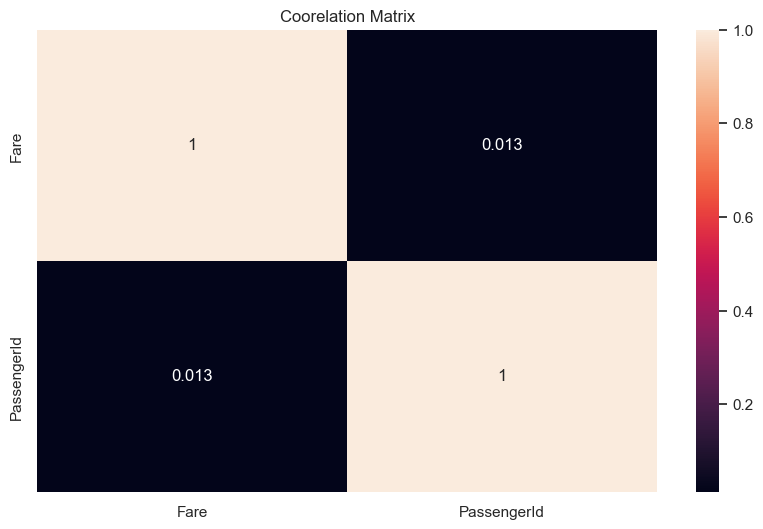

In [53]:
plt.figure(figsize=(10,6)) 
corr_mat =df[["Fare","PassengerId"]].corr()
sns.heatmap(corr_mat,annot=True) 
plt.title("Coorelation Matrix")
print (corr_mat)


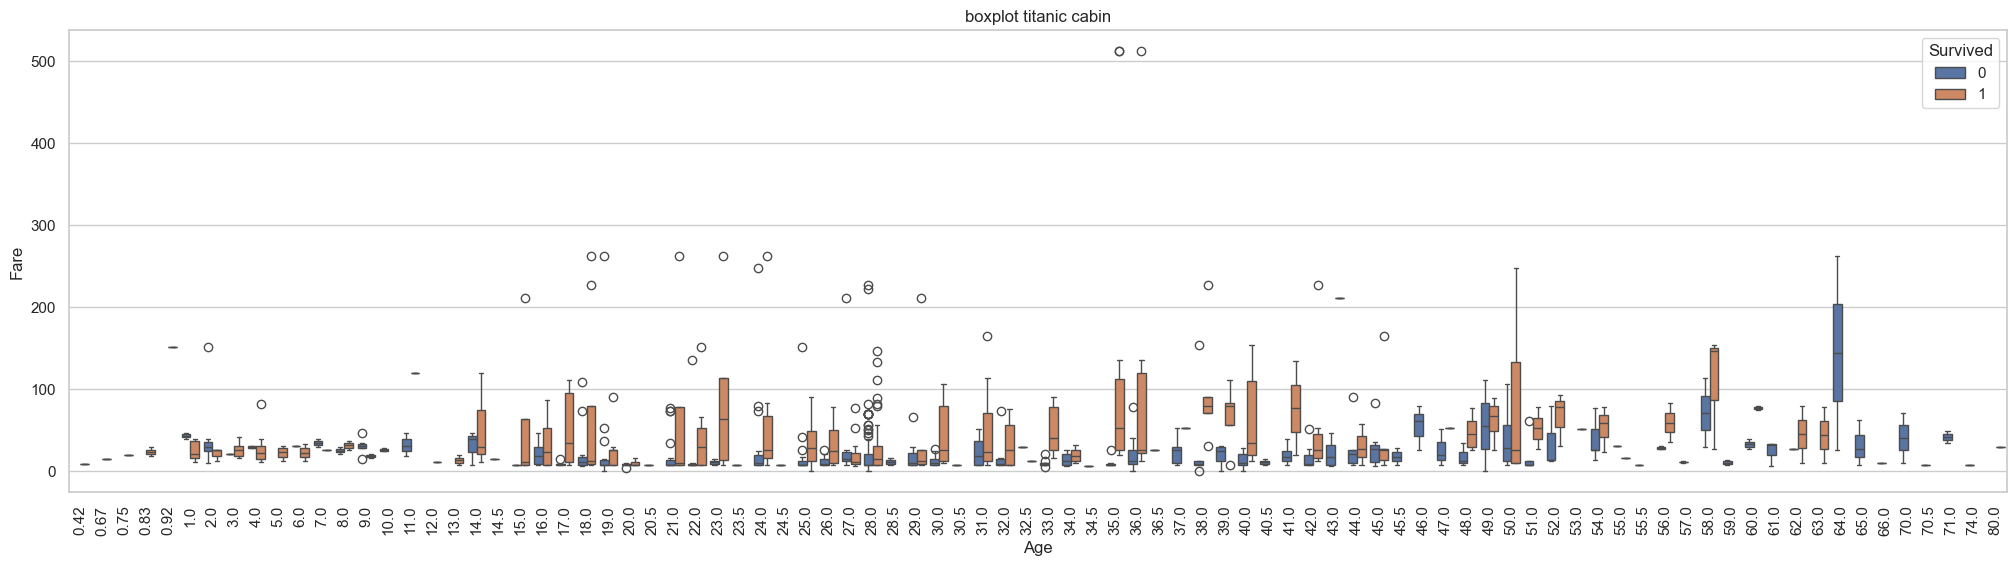

In [61]:
plt.figure(figsize=(25,6) )
sns.boxplot(x="Age",y="Fare",hue='Survived', data=df)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("boxplot titanic cabin")
plt.xticks(rotation=90)
plt.show()

In [19]:
# Survival by Sex

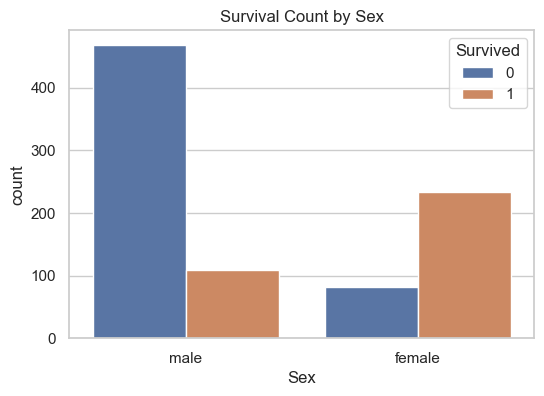

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Sex")
plt.show()

In [21]:
# Survival by Class

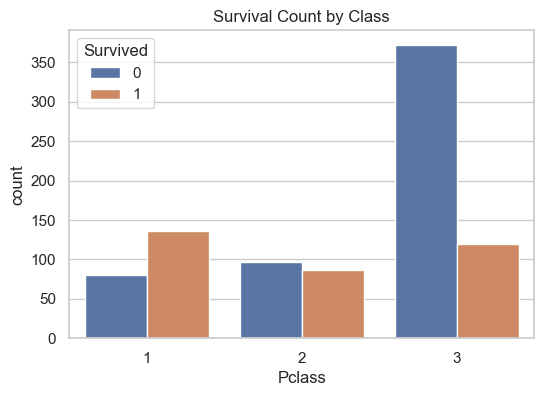

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Count by Class")
plt.show()

In [23]:
# Age Distribution by Survival

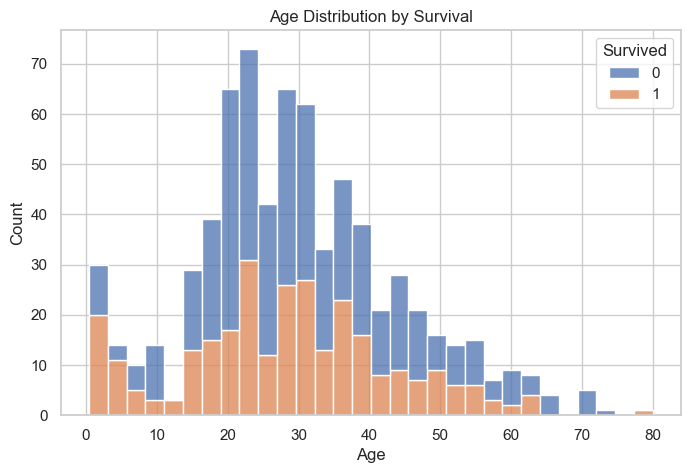

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title("Age Distribution by Survival")
plt.show()


In [25]:
# Step 3: Prediction using Logistic Regression

In [26]:
X = df_cleaned.drop(columns=['Survived', 'PassengerId'])
y = df_cleaned['Survived']

In [27]:
# Train/test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [29]:
# Logistic Regression

In [30]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [31]:
# Predictions

In [32]:
y_pred = model.predict(X_test)

In [33]:
# Evaluation

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8268156424581006


In [36]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       114
           1       0.77      0.75      0.76        65

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [37]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[99 15]
 [16 49]]
